In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.special import roots_hermite
from math import factorial
from gaussian_func import *

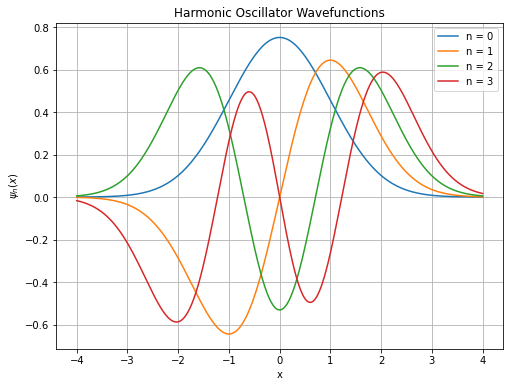

In [67]:
# Hermite polynomial using recurrence relation
def H(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return 2 * x
    else:
        H0 = np.ones_like(x)
        H1 = 2 * x
        for i in range(1, n):
            H_next = 2 * x * H1 - 2 * i * H0
            H0, H1 = H1, H_next
        return H1

# Harmonic oscillator wavefunction
def psi(n, x):
    return (1/np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))) * np.exp(-x**2 / 2) * H(n, x)

# Set the range of x values
x_vals = np.linspace(-4, 4, 400)

# Plot the wavefunctions for n = 0, 1, 2, 3
plt.figure(figsize=(8, 6))
for n in range(4):
    plt.plot(x_vals, psi(n, x_vals), label=f'n = {n}')

plt.title("Harmonic Oscillator Wavefunctions")
plt.xlabel('x')
plt.ylabel(r'$\psi_n(x)$')
plt.legend()
plt.grid(True)
plt.show()


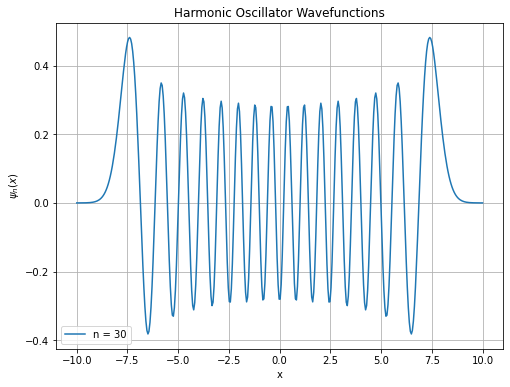

In [68]:
# Set the range of x values
x_vals_b = np.linspace(-10, 10, 400)

n_b = 30

# Plot the wavefunctions for n = 0, 1, 2, 3
plt.figure(figsize=(8, 6))

plt.plot(x_vals_b, psi(n_b, x_vals_b), label=f'n = {n_b}')

plt.title("Harmonic Oscillator Wavefunctions")
plt.xlabel('x')
plt.ylabel(r'$\psi_n(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
def uncertainty_func(n=0, x=None):
    psi_squared = psi(n, x)**2
    return x**2 * psi_squared


# def func_rescale(xp=None, range=None, f=None):
#     weight = (range[1] - range[0]) * 0.5
#     x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.0)
#     return weight * f(x=x)

# def func_gaussian_intg(f, a, b, n):
#     # Get nodes and weights for n-point Gaussian quadrature
#     nodes, weights = np.polynomial.legendre.leggauss(n)
    
#     # Compute the integral using the rescaled nodes and weights
#     integral = sum(func_rescale(xp=node, range=[a, b], f=f) * weight for node, weight in zip(nodes, weights))
#     return integral


N_val = 100


result = np.sqrt(func_gaussian_intg(lambda x: uncertainty_func(n=5, x=x), -10, 10, N_val))


# Print the result
print("Approximate integral:", result)



Approximate integral: 2.3452078799117193


In [75]:

# Perform Gauss-Hermite quadrature for the given function f over the range (-inf, inf)
def gauss_hermite_integrate(f, n_points):
    # Get the roots and weights for the Gauss-Hermite quadrature
    nodes, weights = roots_hermite(n_points)
    
    # Compute the integral
    integral = sum(weights * f(nodes))
    return integral


N_val = 20  # Number of quadrature points

# Compute the integral using Gauss-Hermite quadrature
result = gauss_hermite_integrate(lambda x: uncertainty_func(n=5, x=x) * np.exp(-x**2), N_val)

# Print the result
print("Exact uncertainty value using Gauss-Hermite quadrature:", result)


Exact uncertainty value using Gauss-Hermite quadrature: 0.02991349937902225
